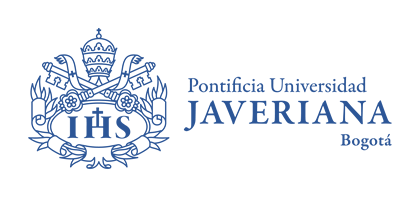

# Aprendizaje de máquina - Taller 2 - Redes neuronales artificiales
En este notebook vamos a explorar implementaciones de redes neuronales feedforward en usando la librería scikit-learn y se propone el enunciado del taller 2 del curso.

## Setup

Importaremos las librerías necesarias para el ejercicio

In [ ]:
import pandas as pd 
import numpy as np
from sklearn import pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split

## Redes neuronales artificiales feedforward

Las redes neuronales de alimentación hacia adelante son modelos de aprendizaje de máquina que conectan las unidades neuronales en capas. Estos modelos tienen una capa de entrada que recibe las instancias, una o más capas intermedias o capas ocultas, y una capa de salida o final que da la respuesta según el problema a resolver (regresión o clasificación). Las unidades neuronales de una capa reciben las activaciones de todas las unidades neuronales de la capa anterior y conectan su activación a todas las unidades neuronales de la capa siguiente.


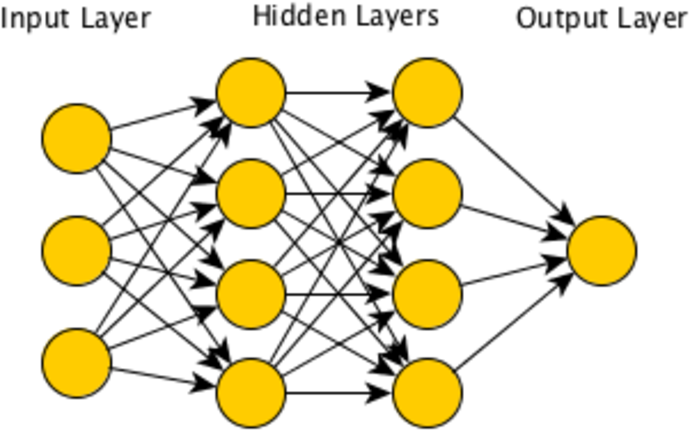

Las redes neuronales artificiales de alimentación hacia adelante son modeladores universales de funciones siempre y cuando se puedan añadir [suficientes unidades neuronales o suficientes capas](https://en.wikipedia.org/wiki/Universal_approximation_theorem)






## Ejercicio - Espirales

Ilustremos inicialmente el uso del modelo de clasificación de redes neuronales utilizando el ejemplo de las espirales que no eran separables por el perceptrón o ADALINE.




In [ ]:
N=1000

In [ ]:
def twospirals(n_points, noise=.5):
    """
     Returns the two spirals dataset.
    """
    n = np.sqrt(np.random.rand(n_points,1)) * 780 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(n_points,1) * noise
    d1y = np.sin(n)*n + np.random.rand(n_points,1) * noise
    return (np.vstack((np.hstack((d1x,d1y)),np.hstack((-d1x,-d1y)))), 
            np.hstack((np.zeros(n_points),np.ones(n_points))))

X, y = twospirals(N)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [ ]:
X_train.shape

(1600, 2)

In [ ]:
X_test.shape

(400, 2)

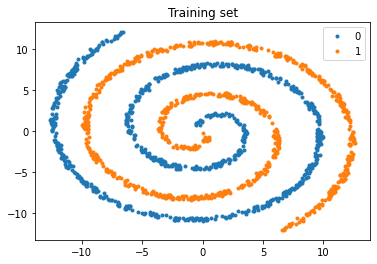

In [ ]:
plt.title('Training set')
plt.plot(X_train[Y_train==0,0], X_train[Y_train==0,1], '.', label=0)
plt.plot(X_train[Y_train==1,0], X_train[Y_train==1,1], '.', label=1)
plt.legend()
plt.show()

## Creación de pipelines de scikit-learn

Los [Pipelines](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) de scikt-learn nos permiten definir una serie de transformaciones que se van a realizar sobre los datos de manera secuencial, hasta llegar al modelo final. 

Los elementos que se creen en un pipeline deben tener los métodos `fit` y `transform`, salvo el último elemento que debe tener solamente un método `fit`. Es una buena práctica utilizar pipelines para evitar la fuga de información del conjunto de validación o el conjunto de test a los demás datos. Por ejemplo, al normalizar las entradas solo lo debemos hacer tomando en cuenta el promedio y desviación estandar del dataset de entrenamiento, no el promedio o desviación del dataset completo. Un pipeline nos permite aprender estos parámetros solamente con el conjunto de entrenamiento, y aplicarlo después a los demás datos.

En este caso crearemos un pipeline para aplicar la estandarización de los datos y un modelo de clasificación utilizando redes neuronales para el ejercicio de la espiral.

In [ ]:
standarizer = StandardScaler() ### normaliza. preprocesing sklearn
network = MLPClassifier()

In [ ]:
pipe = pipeline.Pipeline([('standarizer', standarizer), ('network', network)])

In [ ]:
# El pipeline abstrae los parámetros que vamos a ajustar para el estandarizador y la red
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standarizer', 'network', 'standarizer__copy', 'standarizer__with_mean', 'standarizer__with_std', 'network__activation', 'network__alpha', 'network__batch_size', 'network__beta_1', 'network__beta_2', 'network__early_stopping', 'network__epsilon', 'network__hidden_layer_sizes', 'network__learning_rate', 'network__learning_rate_init', 'network__max_fun', 'network__max_iter', 'network__momentum', 'network__n_iter_no_change', 'network__nesterovs_momentum', 'network__power_t', 'network__random_state', 'network__shuffle', 'network__solver', 'network__tol', 'network__validation_fraction', 'network__verbose', 'network__warm_start'])

In [ ]:
help(pipe.fit)

Help on method fit in module sklearn.pipeline:

fit(X, y=None, **fit_params) method of sklearn.pipeline.Pipeline instance
    Fit the model.
    
    Fit all the transformers one after the other and transform the
    data. Finally, fit the transformed data using the final estimator.
    
    Parameters
    ----------
    X : iterable
        Training data. Must fulfill input requirements of first step of the
        pipeline.
    
    y : iterable, default=None
        Training targets. Must fulfill label requirements for all steps of
        the pipeline.
    
    **fit_params : dict of string -> object
        Parameters passed to the ``fit`` method of each step, where
        each parameter name is prefixed such that parameter ``p`` for step
        ``s`` has key ``s__p``.
    
    Returns
    -------
    self : object
        Pipeline with fitted steps.



In [ ]:
help(pipe.fit_transform)

Help on method fit_transform in module sklearn.pipeline:

fit_transform(X, y=None, **fit_params) method of sklearn.pipeline.Pipeline instance
    Fit the model and transform with the final estimator.
    
    Fits all the transformers one after the other and transform the
    data. Then uses `fit_transform` on transformed data with the final
    estimator.
    
    Parameters
    ----------
    X : iterable
        Training data. Must fulfill input requirements of first step of the
        pipeline.
    
    y : iterable, default=None
        Training targets. Must fulfill label requirements for all steps of
        the pipeline.
    
    **fit_params : dict of string -> object
        Parameters passed to the ``fit`` method of each step, where
        each parameter name is prefixed such that parameter ``p`` for step
        ``s`` has key ``s__p``.
    
    Returns
    -------
    Xt : ndarray of shape (n_samples, n_transformed_features)
        Transformed samples.



## MLPClassifier 

La implementación en la libreria scikit-learn de una red neuronal feed-forward para un problema de clasificación es la clase [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

Algunos parámetros importantes que se configuran de este clasificador son los siguientes:



*   `hidden_layer_sizes` tuple, tupla que indica el tamaño de las capas ocultas
*   `activation` {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, activación de las capas ocultas, por defecto es ReLu
*   `solver` {‘lbfgs’, ‘sgd’, ‘adam’}, optimizador
*    `alpha` , fortaleza de la regularización L2
* `batch_size` , tamaño del mini-batch de entrenamiento para optimizadores sgd y adam
* `learning_rate_init` , tasa de aprendizaje inicial
*  `max_iter`, número de iteraciones
* `early_stopping`, bool que indica si se deben terminar las épocas antes de tiempo si el error sobre validación (aparta automáticamente el 10% de los datos de entrenamiento) no mejora al menos `tol` durante `n_iter_no_change` iteraciones.
* `validation_fraction`, Porcentaje de datos apartados para validación


In [ ]:
# Probemos un conjunto de parámetros, note que se añade la palabra network antes del modelo para ajustar directamente los parámetros sobre el pipeline
params_test={
        "network__hidden_layer_sizes": (32,32),
        "network__solver": "adam",
        "network__alpha": 0.0001,
        "network__activation":"relu",
        "network__learning_rate": "adaptive",
        "network__solver": "sgd",
        "network__batch_size":32,
        "network__early_stopping":True,
        "network__validation_fraction":0.2,
        "network__n_iter_no_change":5,
        "network__learning_rate_init": 0.025,
        "network__max_iter":100000
}

In [ ]:
pipe.set_params(**params_test)

Pipeline(steps=[('standarizer', StandardScaler()),
                ('network',
                 MLPClassifier(batch_size=32, early_stopping=True,
                               hidden_layer_sizes=(32, 32),
                               learning_rate='adaptive',
                               learning_rate_init=0.025, max_iter=100000,
                               n_iter_no_change=5, solver='sgd',
                               validation_fraction=0.2))])

In [ ]:
# Ejecutamos proceso de entrenamiento
pipe.fit(X_train,Y_train)

Pipeline(steps=[('standarizer', StandardScaler()),
                ('network',
                 MLPClassifier(batch_size=32, early_stopping=True,
                               hidden_layer_sizes=(32, 32),
                               learning_rate='adaptive',
                               learning_rate_init=0.025, max_iter=100000,
                               n_iter_no_change=5, solver='sgd',
                               validation_fraction=0.2))])

In [ ]:
# Obtengo el modelo de network solamente para ver cómo quedo ajustado
net = pipe.named_steps['network']

In [ ]:
net

MLPClassifier(batch_size=32, early_stopping=True, hidden_layer_sizes=(32, 32),
              learning_rate='adaptive', learning_rate_init=0.025,
              max_iter=100000, n_iter_no_change=5, solver='sgd',
              validation_fraction=0.2)

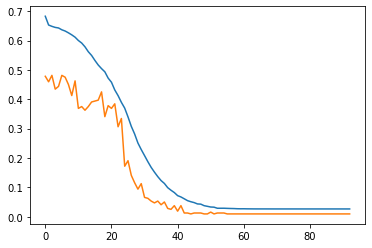

In [ ]:
# Curva azul que me dice cuál es el performance en entrenamiento vs función de costo
plt.plot(net.loss_curve_)
# Curva naranja me dice cuál es el score de evaluación (1-error escalado entre 0 y 1)
plt.plot( 1 - np.array(net.validation_scores_))

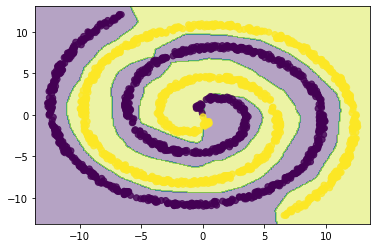

In [ ]:
# Código tomado de https://github.com/tirthajyoti/Machine-Learning-with-Python/blob/master/Utilities/ML-Python-utils.py

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].    

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
# Meshgrid creation
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh using the model.
Z = pipe.predict(np.c_[xx.ravel(), yy.ravel()])    

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))

# Predictions to obtain the classification results
Z = pipe.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plotting
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)

## Punto 1 (20%)

Esta red aún no presenta un buen comportamiento en el conjunto de datos. Explore los hiperparámetros de la red para realizar una clasificación adecuada, mida el performance utilizando métricas de clasificación. Justifique los pasos que lo llevaron a escoger el modelo utilizando las curvas del proceso de aprendizaje.

- Se usó Adam para facilitar el descenso del gradiente
- Se usó Regularización L2.
- Se incrementó el learning rate de 0.0001 a 0.025
- Se incrementó el número de interaciones a 100000, pero reduciendo el n_iter_no_change a 5 y un early stop para evitar un overfitting.
- Se usó RELU como función de activación para lograr 




## Punto 2 (80%)

Descargue del archivo disponible en Brightspace. Los datos son de una tarea de clasificación misteriosa. Se le han suministrado 2 datasets: public_dataset y quiz.

Ud debe en el taller construir un modelo de redes neuronales que prediga la variable label. 

Además de su informe y código que usualmente se deben entregar en el taller, debe entregar un archivo Python ejecutable que lea los pesos de la red creada, lea el archivo quiz.csv y cree un archivo llamado answers.txt con la etiqueta predicha para cada elemento del archivo quiz.csv en orden.

Los 2 grupos con mejor desempeño en el dataset quiz, tendrán bono en la nota del taller 2.


In [ ]:
mistery_df = pd.read_csv('public_dataset.csv')

In [ ]:
mistery_df.describe()

In [ ]:
mistery_df.loc[:,'label'].value_counts()

In [ ]:
quiz_df=pd.read_csv('quiz.csv')

In [ ]:
quiz_df.describe()